In [1]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize
def gen_labels(im_name, pat1, pat2):

     if pat1 in im_name:
         label = np.array([0])
     elif pat2 in im_name:
         label = np.array([1])
     return label
def get_data(data_path, data_list, img_h, img_w):
    img_labels = []
    
    for item in enumerate(data_list):
         img = imread(os.path.join(data_path, item[1]), as_gray = True) # "as_grey"
         img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
         img_labels.append([np.array(img), gen_labels(item[1], 'Mel', 'Nev')])

         if item[0] % 100 == 0:
             print('Reading: {0}/{1} of train images'.format(item[0], len(data_list)))
    shuffle(img_labels)
    return img_labels

def get_data_arrays(nested_list, img_h, img_w):
     
     img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
     label_arrays = np.zeros((len(nested_list)), dtype = np.int32)
     for ind in range(len(nested_list)):
         img_arrays[ind] = nested_list[ind][0]
         label_arrays[ind] = nested_list[ind][1]
     img_arrays = np.expand_dims(img_arrays, axis =3)
     return img_arrays, label_arrays

def get_train_test_arrays(train_data_path, test_data_path, train_list,
 test_list, img_h, img_w):

     train_data = get_data(train_data_path, train_list, img_h, img_w)
     test_data = get_data(test_data_path, test_list, img_h, img_w)

     train_img, train_label = get_data_arrays(train_data, img_h, img_w)
     test_img, test_label = get_data_arrays(test_data, img_h, img_w)
     del(train_data)
     del(test_data)
     return train_img, test_img, train_label, test_label

img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = '../Data/Lab1/Skin/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)
x_train, x_test, y_train, y_test = get_train_test_arrays(train_data_path, test_data_path,train_list, test_list, img_h, img_w)

Reading: 0/1000 of train images
Reading: 100/1000 of train images
Reading: 200/1000 of train images
Reading: 300/1000 of train images
Reading: 400/1000 of train images
Reading: 500/1000 of train images
Reading: 600/1000 of train images
Reading: 700/1000 of train images
Reading: 800/1000 of train images
Reading: 900/1000 of train images
Reading: 0/200 of train images
Reading: 100/200 of train images


# Task 1A: VGG16 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from Functions import vgg16_model

model = vgg16_model(img_ch=1, img_width=128, img_height=128, base=8,drop=False,d_rate=0,num_classes=1)

# Compile the model

learning_rate = 1e-5
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Define training parameters
n_epochs = 100
batch_size = 8

# Generate some example data (replace with your actual data)
train_data = x_train
train_labels = y_train
val_data = x_test
val_labels = y_test

# Train the model
clf_histA = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from Functions import plotcurve
plotcurve(clf_histA,metrics='binary')

# Task 2 

In [1]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize
def gen_labels(im_name, pat1, pat2):

     if pat1 in im_name:
         label = np.array([0])
     elif pat2 in im_name:
         label = np.array([1])
     return label
def get_data(data_path, data_list, img_h, img_w):
    img_labels = []
    
    for item in enumerate(data_list):
         img = imread(os.path.join(data_path, item[1]), as_gray = True) # "as_grey"
         img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
         img_labels.append([np.array(img), gen_labels(item[1], 'AFF', 'NFF')])

         if item[0] % 100 == 0:
             print('Reading: {0}/{1} of train images'.format(item[0], len(data_list)))
    shuffle(img_labels)
    return img_labels

def get_data_arrays(nested_list, img_h, img_w):
     
     img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
     label_arrays = np.zeros((len(nested_list)), dtype = np.int32)
     for ind in range(len(nested_list)):
         img_arrays[ind] = nested_list[ind][0]
         label_arrays[ind] = nested_list[ind][1]
     img_arrays = np.expand_dims(img_arrays, axis =3)
     return img_arrays, label_arrays

def get_train_test_arrays(train_data_path, test_data_path, train_list,
 test_list, img_h, img_w):

     train_data = get_data(train_data_path, train_list, img_h, img_w)
     test_data = get_data(test_data_path, test_list, img_h, img_w)

     train_img, train_label = get_data_arrays(train_data, img_h, img_w)
     test_img, test_label = get_data_arrays(test_data, img_h, img_w)
     del(train_data)
     del(test_data)
     return train_img, test_img, train_label, test_label

img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = '../Data/Lab1/Bone/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)
x_train2, x_test2, y_train2, y_test2 = get_train_test_arrays(train_data_path, test_data_path,train_list, test_list, img_h, img_w)

Reading: 0/1072 of train images
Reading: 100/1072 of train images
Reading: 200/1072 of train images
Reading: 300/1072 of train images
Reading: 400/1072 of train images
Reading: 500/1072 of train images
Reading: 600/1072 of train images
Reading: 700/1072 of train images
Reading: 800/1072 of train images
Reading: 900/1072 of train images
Reading: 1000/1072 of train images
Reading: 0/140 of train images
Reading: 100/140 of train images


In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from Functions import vgg16_model, plotcurve
model2 = vgg16_model(img_ch=1, img_width=128, img_height=128, base=16,drop=False,d_rate=0,num_classes=1)
# Compile the model

learning_rate = 2e-5
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Define training parameters
n_epochs = 100
batch_size = 8

# Generate some example data (replace with your actual data)
train_data = x_train2
train_labels = y_train2
val_data = x_test2
val_labels = y_test2

# Train the model
clf_hist2 = model2.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_65 (Conv2D)          (None, 128, 128, 16)      160       
                                                                 
 conv2d_66 (Conv2D)          (None, 128, 128, 16)      2320      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 conv2d_68 (Conv2D)          (None, 64, 64, 32)        9248      
                                                           

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

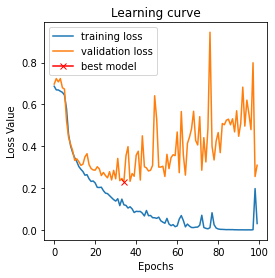

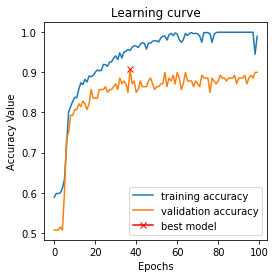

In [12]:
from Functions import plotcurve
plotcurve(clf_hist2,metrics='accu')

# Task 4

In [13]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical

# Define the number of classes
num_classes = 9

def get_labels(im_name, classes):
    for idx, pat in enumerate(classes):
        if pat in im_name:
            return idx
    return len(classes)

def get_data(data_path, data_list, img_h, img_w):
    img_labels = []

    for item in enumerate(data_list):
        img = imread(os.path.join(data_path, item[1]), as_gray=True)
        img = resize(img, (img_h, img_w), anti_aliasing=True).astype('float32')
        img_labels.append([np.array(img), get_labels(item[1], classes)])

        if item[0] % 100 == 0:
            print('Reading: {0}/{1} of images'.format(item[0], len(data_list)))
    shuffle(img_labels)
    return img_labels

def get_data_arrays(nested_list, img_h, img_w):
    img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype=np.float32)
    label_arrays = np.zeros((len(nested_list), num_classes), dtype=np.int32)
    for ind in range(len(nested_list)):
        img_arrays[ind] = nested_list[ind][0]
        label_arrays[ind][nested_list[ind][1]] = 1  # One-hot encoding

    img_arrays = np.expand_dims(img_arrays, axis=3)
    return img_arrays, label_arrays

def get_train_test_arrays(train_data_path, test_data_path, train_list,
 test_list, img_h, img_w):

     train_data = get_data(train_data_path, train_list, img_h, img_w)
     test_data = get_data(test_data_path, test_list, img_h, img_w)

     train_img, train_label = get_data_arrays(train_data, img_h, img_w)
     test_img, test_label = get_data_arrays(test_data, img_h, img_w)
     del(train_data)
     del(test_data)
     return train_img, test_img, train_label, test_label

# Modify the label arrays for one-hot encoding

classes = ['C1','C2','C3','C4','C5','C6','C7','C8','C9',]

img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = '../Data/Lab1/X_ray/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)
x_train4, x_test4, y_train4, y_test4 = get_train_test_arrays(train_data_path, test_data_path,train_list, test_list, img_h, img_w)

Reading: 0/5780 of images
Reading: 100/5780 of images
Reading: 200/5780 of images
Reading: 300/5780 of images
Reading: 400/5780 of images
Reading: 500/5780 of images
Reading: 600/5780 of images
Reading: 700/5780 of images
Reading: 800/5780 of images
Reading: 900/5780 of images
Reading: 1000/5780 of images
Reading: 1100/5780 of images
Reading: 1200/5780 of images
Reading: 1300/5780 of images
Reading: 1400/5780 of images
Reading: 1500/5780 of images
Reading: 1600/5780 of images
Reading: 1700/5780 of images
Reading: 1800/5780 of images
Reading: 1900/5780 of images
Reading: 2000/5780 of images
Reading: 2100/5780 of images
Reading: 2200/5780 of images
Reading: 2300/5780 of images
Reading: 2400/5780 of images
Reading: 2500/5780 of images
Reading: 2600/5780 of images
Reading: 2700/5780 of images
Reading: 2800/5780 of images
Reading: 2900/5780 of images
Reading: 3000/5780 of images
Reading: 3100/5780 of images
Reading: 3200/5780 of images
Reading: 3300/5780 of images
Reading: 3400/5780 of imag

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from Functions import generate_lenet_model
#LeNet
model4le = generate_lenet_model(img_ch=1, img_width=128, img_height=128, base=16, drop=False, d_rate=0, num_classes=9)

learning_rate = 1e-5
model4le.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Define training parameters
n_epochs = 100
batch_size = 8

# Generate some example data (replace with your actual data)
train_data = x_train4
train_labels = y_train4
val_data = x_test4
val_labels = y_test4

# Train the model
clf_hist4le = model4le.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_78 (Conv2D)          (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 32768)             0   

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

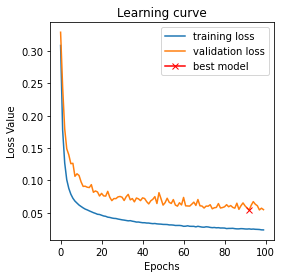

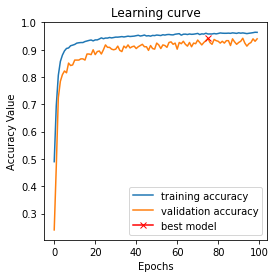

In [15]:
from Functions import plotcurve
plotcurve(clf_hist4le, metrics='accu')

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from Functions import generate_alexnet_model, plotcurve

#AlexNet
model4al = generate_alexnet_model(img_ch=1, img_width=128, img_height=128, n_base=8, drop=False, d_rate=0, num_classes=9)

learning_rate = 1e-5
model4al.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Define training parameters
n_epochs = 100
batch_size = 16

# Generate some example data (replace with your actual data)
train_data = x_train4
train_labels = y_train4
val_data = x_test4
val_labels = y_test4

# Train the model
clf_hist4al = model4al.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)


In [ ]:
plotcurve(clf_hist4al,'accu')

# Task 5

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_116 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 re_lu (ReLU)                (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_117 (Conv2D)         (None, 64, 64, 16)        1168      
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 16)        0         
                                                          

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

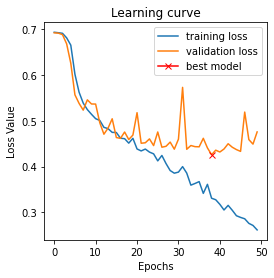

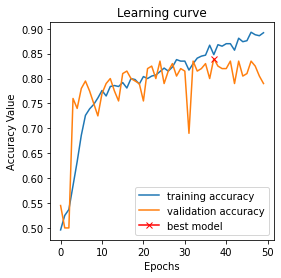

In [26]:
#5A
from Functions import plotcurve
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,ReLU

def alexnet_model(img_ch, img_width, img_height, n_base,drop,d_rate,norm):
    
    inputs_layer = Input(shape=(img_width, img_height, img_ch))
    x = Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch), kernel_size=(3, 3), strides=(1, 1), padding='same')(inputs_layer)
    if norm:
        x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=n_base * 2, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    if norm:
        x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=n_base * 4, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    if norm:
        x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters=n_base * 4, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    if norm:
        x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters=n_base * 2, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    if norm:
        x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(64,activation='relu')(x)
    if drop:
        x = Dropout(rate=d_rate)(x)
    x = Dense(64, activation='relu')(x)
    if drop:
        x = Dropout(rate=d_rate)(x)
    out = Dense(1,activation='sigmoid')(x)
    
    clf = tf.keras.Model(inputs=inputs_layer, outputs=out)
    clf.summary()
    return clf

model5A = alexnet_model (1,128,128,8,drop=False,d_rate=0,norm=False)

learning_rate = 1e-4
model5A.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Define training parameters
n_epochs = 50
batch_size = 8

# Generate some example data (replace with your actual data)
train_data = x_train
train_labels = y_train
val_data = x_test
val_labels = y_test

# Train the model
clf_hist5A = model5A.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)
plotcurve(clf_hist5A,metrics='binary')

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_100 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_101 (Conv2D)         (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_102 (Conv2D)         (None, 32, 32, 32)        464

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

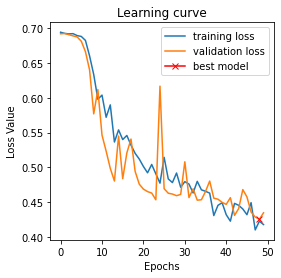

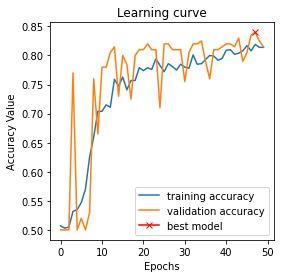

In [21]:
#5A with dropout

model5A = alexnet_model (1,128,128,8,drop=True,d_rate=0.4,norm=False)

learning_rate = 1e-4
model5A.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Define training parameters
n_epochs = 50
batch_size = 8

# Generate some example data (replace with your actual data)
train_data = x_train
train_labels = y_train
val_data = x_test
val_labels = y_test

# Train the model
clf_hist5A = model5A.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)
plotcurve(clf_hist5A,metrics='binary')

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_121 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 batch_normalization_10 (Bat  (None, 128, 128, 8)      32        
 chNormalization)                                                
                                                                 
 re_lu_5 (ReLU)              (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_122 (Conv2D)         (None, 64, 64, 16)        116

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

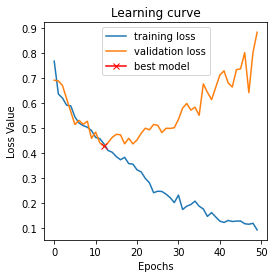

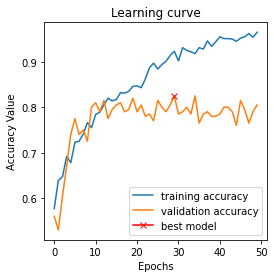

In [27]:
#5B with dropout

model5Bdr = alexnet_model (1,128,128,8,drop=True,d_rate=0.4,norm=True)

learning_rate = 1e-4
model5Bdr.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Define training parameters
n_epochs = 50
batch_size = 8

# Generate some example data (replace with your actual data)
train_data = x_train
train_labels = y_train
val_data = x_test
val_labels = y_test

# Train the model
clf_hist5Bdr = model5Bdr.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)
plotcurve(clf_hist5Bdr,'binary')

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_131 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 batch_normalization_20 (Bat  (None, 128, 128, 8)      32        
 chNormalization)                                                
                                                                 
 re_lu_15 (ReLU)             (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_132 (Conv2D)         (None, 64, 64, 16)        116

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

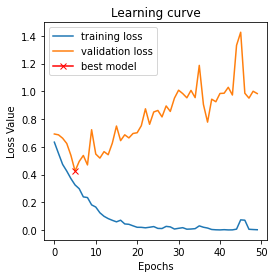

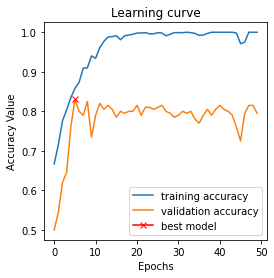

In [29]:
#5B without drouput
model5B = alexnet_model (1,128,128,8,drop=False,d_rate=0.4,norm=True)

learning_rate = 1e-4
model5B.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Define training parameters
n_epochs = 50
batch_size = 8

# Generate some example data (replace with your actual data)
train_data = x_train
train_labels = y_train
val_data = x_test
val_labels = y_test

# Train the model
clf_hist5B = model5B.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)
plotcurve(clf_hist5B,'binary')

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_136 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 batch_normalization_25 (Bat  (None, 128, 128, 8)      32        
 chNormalization)                                                
                                                                 
 re_lu_20 (ReLU)             (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_137 (Conv2D)         (None, 64, 64, 16)        116

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

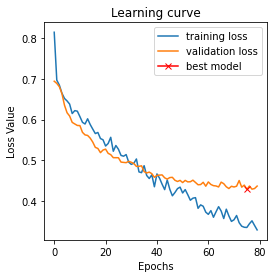

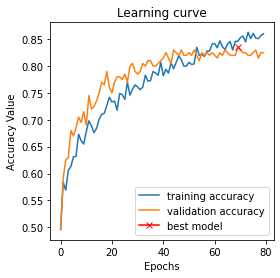

In [30]:
#5C with NORM
model5CN = alexnet_model (1,128,128,8,drop=True,d_rate=0.4,norm=True)

learning_rate = 1e-5
model5CN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Define training parameters
n_epochs = 80
batch_size = 8

# Generate some example data (replace with your actual data)
train_data = x_train
train_labels = y_train
val_data = x_test
val_labels = y_test

# Train the model
clf_hist5CN = model5CN.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)
plotcurve(clf_hist5CN,'binary')

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_141 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 re_lu_25 (ReLU)             (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_142 (Conv2D)         (None, 64, 64, 16)        1168      
                                                                 
 re_lu_26 (ReLU)             (None, 64, 64, 16)        0         
                                                          

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

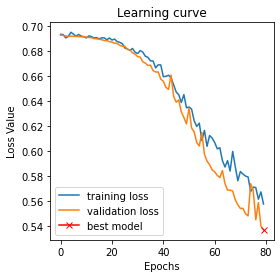

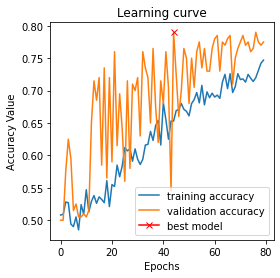

In [31]:
#5C without NORM
model5C = alexnet_model (1,128,128,8,drop=True,d_rate=0.4,norm=False)

learning_rate = 1e-5
model5C.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Define training parameters
n_epochs = 80
batch_size = 8

# Generate some example data (replace with your actual data)
train_data = x_train
train_labels = y_train
val_data = x_test
val_labels = y_test

# Train the model
clf_hist5C = model5C.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)
plotcurve(clf_hist5C,'binary')

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_146 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 batch_normalization_30 (Bat  (None, 128, 128, 8)      32        
 chNormalization)                                                
                                                                 
 re_lu_30 (ReLU)             (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_147 (Conv2D)         (None, 64, 64, 16)        116

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

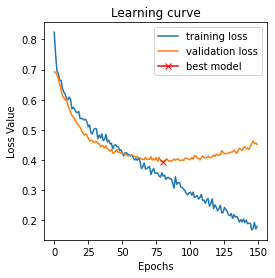

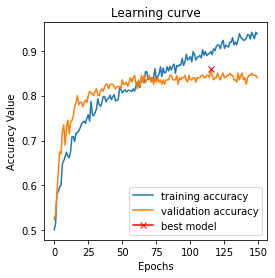

In [32]:
#5D with NORM 
model5C = alexnet_model (1,128,128,8,drop=True,d_rate=0.4,norm=True)

learning_rate = 1e-5
model5C.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Define training parameters
n_epochs = 150
batch_size = 8

# Generate some example data (replace with your actual data)
train_data = x_train
train_labels = y_train
val_data = x_test
val_labels = y_test

# Train the model
clf_hist5C = model5C.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)
plotcurve(clf_hist5C,'binary')

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_151 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 re_lu_35 (ReLU)             (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_152 (Conv2D)         (None, 64, 64, 16)        1168      
                                                                 
 re_lu_36 (ReLU)             (None, 64, 64, 16)        0         
                                                          

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

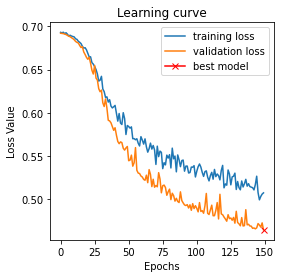

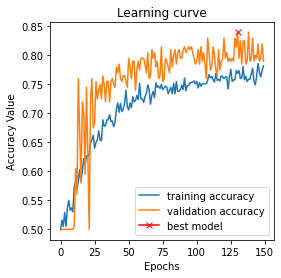

In [33]:
#5D without NORM 
model5C = alexnet_model (1,128,128,8,drop=True,d_rate=0.4,norm=False)

learning_rate = 1e-5
model5C.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Define training parameters
n_epochs = 150
batch_size = 8

# Generate some example data (replace with your actual data)
train_data = x_train
train_labels = y_train
val_data = x_test
val_labels = y_test

# Train the model
clf_hist5C = model5C.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)
plotcurve(clf_hist5C,'binary')

# Task 6

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 spatial_dropout2d (SpatialD  (None, 128, 128, 32)     0         
 ropout2D)                                                       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 spatial_dropout2d_1 (Spatia  (None, 64, 64, 64)       0     

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

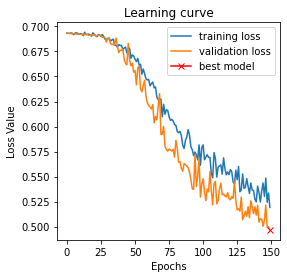

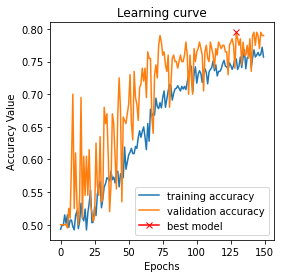

In [4]:
#6A Spatial dropout layers
from Functions import plotcurve
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,ReLU
from tensorflow.keras.layers import SpatialDropout2D
from Functions import plotcurve
def alexnet_model_sp(img_ch, img_width, img_height, n_base,drop,d_rate,spacial,s_rate):
    
    inputs_layer = Input(shape=(img_width, img_height, img_ch))
    x = Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch), kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(inputs_layer)
    if spacial:
        x = SpatialDropout2D(rate=s_rate)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=n_base * 2, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(x)
    if spacial:
        x = SpatialDropout2D(rate=s_rate)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=n_base * 4, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(x)
    if spacial:
        x = SpatialDropout2D(rate=s_rate)(x)
    x = Conv2D(filters=n_base * 4, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(x)
    if spacial:
        x = SpatialDropout2D(rate=s_rate)(x)
    x = Conv2D(filters=n_base * 2, kernel_size=(3, 3), strides=(1, 1), padding='same',activation='relu')(x)
    if spacial:
        x = SpatialDropout2D(rate=s_rate)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(64,activation='relu')(x)
    if drop:
        x = Dropout(rate=d_rate)(x)
    x = Dense(64, activation='relu')(x)
    if drop:
        x = Dropout(rate=d_rate)(x)
    out = Dense(1,activation='sigmoid')(x)
    
    clf = tf.keras.Model(inputs=inputs_layer, outputs=out)
    clf.summary()
    return clf

model6Asp = alexnet_model_sp (1,128,128,32,drop=True,d_rate=0.4,spacial=True,s_rate=0.1)

learning_rate = 1e-5
model6Asp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Define training parameters
n_epochs = 150
batch_size = 8

# Generate some example data (replace with your actual data)
train_data = x_train
train_labels = y_train
val_data = x_test
val_labels = y_test

# Train the model
clf_hist6Asp = model6Asp.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)
plotcurve(clf_hist6Asp,'binary')

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_161 (Conv2D)         (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_162 (Conv2D)         (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_163 (Conv2D)         (None, 32, 32, 128)       738

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

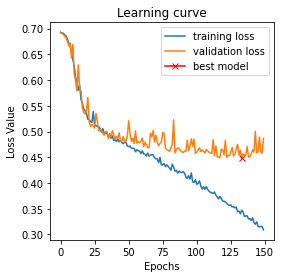

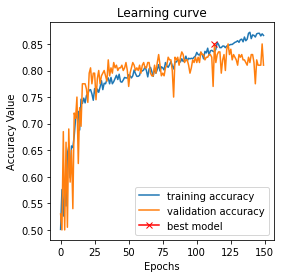

In [35]:
model6A = alexnet_model_sp (1,128,128,32,drop=False,d_rate=0,spacial=False,s_rate=0)

learning_rate = 1e-5
model6A.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Define training parameters
n_epochs = 150
batch_size = 8

# Generate some example data (replace with your actual data)
train_data = x_train
train_labels = y_train
val_data = x_test
val_labels = y_test

# Train the model
clf_hist6A = model6A.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)
plotcurve(clf_hist6A,'binary')

In [7]:
#6B 250 epochs with spacial
model6Bsp = alexnet_model_sp (1,128,128,32,drop=True,d_rate=0.4,spacial=True,s_rate=0.1)

learning_rate = 1e-5
model6Bsp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Define training parameters
n_epochs = 250
batch_size = 8

# Generate some example data (replace with your actual data)
train_data = x_train
train_labels = y_train
val_data = x_test
val_labels = y_test

# Train the model
clf_hist6Bsp = model6Bsp.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)
plotcurve(clf_hist6Bsp,'binary')

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 spatial_dropout2d_10 (Spati  (None, 128, 128, 32)     0         
 alDropout2D)                                                    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 spatial_dropout2d_11 (Spati  (None, 64, 64, 64)       0   

KeyboardInterrupt: 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

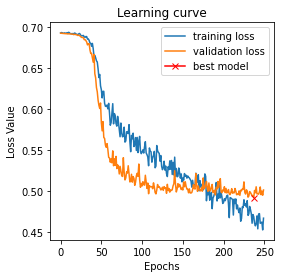

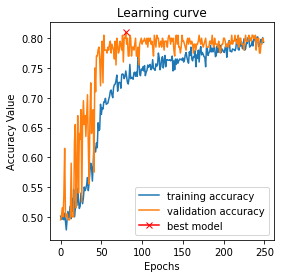

In [8]:
plotcurve(clf_hist6Bsp,'binary')

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 128)       7385

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

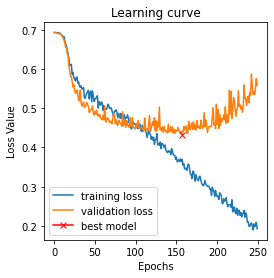

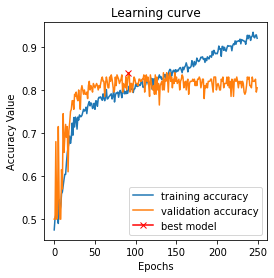

In [9]:
model6B = alexnet_model_sp (1,128,128,32,drop=True,d_rate=0.4,spacial=False,s_rate=0.1)

learning_rate = 1e-5
model6B.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Define training parameters
n_epochs = 250
batch_size = 8

# Generate some example data (replace with your actual data)
train_data = x_train
train_labels = y_train
val_data = x_test
val_labels = y_test

# Train the model
clf_hist6B = model6B.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)
plotcurve(clf_hist6B,'binary')

 # Task 7
 

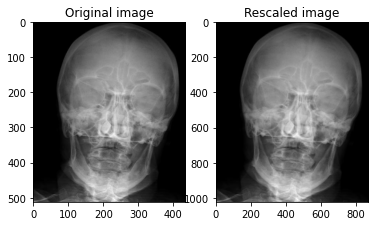

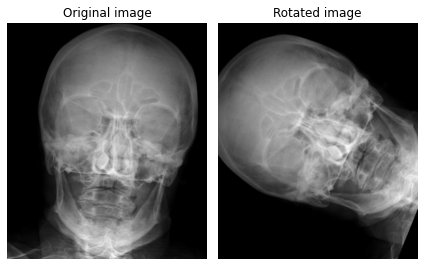

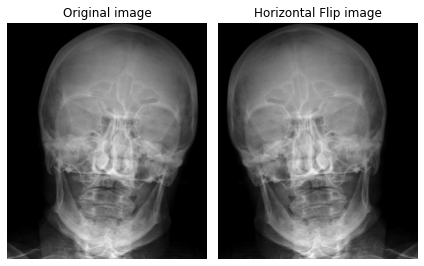

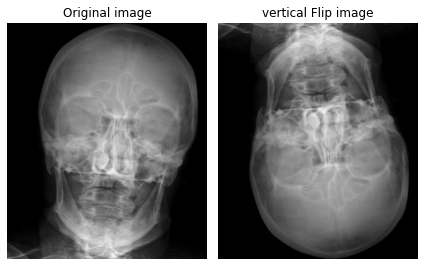

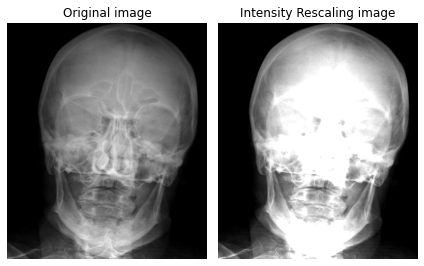

In [4]:
#7A
import numpy as np
from skimage.io import imread
from skimage.transform import rescale
from skimage.transform import rotate
from skimage import exposure
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sample_dir = '../Data/Lab1/X_ray/train/C4_4662.jpg'
img = imread(sample_dir)
row, col = img.shape
def show_paired(Original, Transform, Operation):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()
    ax[0].imshow(Original, cmap='gray')
    ax[0].set_title("Original image")
    ax[1].imshow(Transform, cmap='gray')
    ax[1].set_title(Operation + " image")
    if Operation == "Rescaled":
        ax[0].set_xlim(0, col)
        ax[0].set_ylim(row, 0)
    else:
        ax[0].axis('off')
        ax[1].axis('off')
        plt.tight_layout()
    
# Scaling
scale_factor = 2
image_rescaled = rescale(img, scale_factor)
show_paired(img, image_rescaled, "Rescaled")
# Roation
angle = 68
image_rotated = rotate(img, angle)
show_paired(img, image_rotated, "Rotated")
# Horizontal Flip
horizontal_flip = img[:, ::-1]
show_paired(img, horizontal_flip, 'Horizontal Flip')
# Vertical Flip
vertical_flip = img[::-1, :]
show_paired(img, vertical_flip, 'vertical Flip')
# Intensity rescaling
low_bound, high_boud = 10, 80
min_val, max_val = np.percentile(img, (low_bound, high_boud))
better_contrast = exposure.rescale_intensity(img, in_range=(min_val,
max_val)) 
show_paired(img, better_contrast, 'Intensity Rescaling')

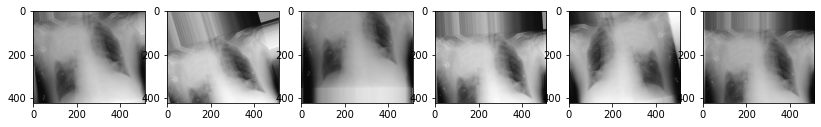

In [5]:
#7B
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img


Sample = '../Data/Lab1/X_ray/train/C1_1000.jpg'
Img = imread(Sample)
Img = np.expand_dims(Img, axis = 2)
Img = np.expand_dims(Img, axis = 0)

count = 5
my_gen = ImageDataGenerator(rotation_range = 20,width_shift_range = 0.2,horizontal_flip = True)
fix, ax = plt.subplots(1,count+1, figsize=(14,2))
images_flow = my_gen.flow(Img, batch_size=1)
for i, new_images in enumerate(images_flow):
    new_image = array_to_img(new_images[0], scale=True)
    ax[i].imshow(new_image,cmap="gray")
    if i >= count:
        break


# Task 8

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                          

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

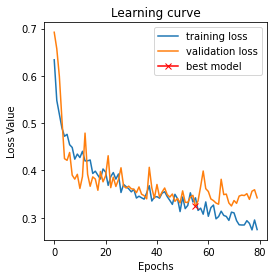

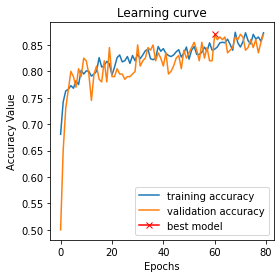

In [8]:
# 1)Import required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,ReLU
# 2) set the directory to the data and model parameters like:

train_dir = '../Data/Lab2/Skin/train' 
val_dir = '../Data/Lab2/Skin/validation/' 

# 3)Model architecture like:

def alexnet_model8(img_ch, img_width, img_height, n_base,drop,d_rate,norm):
    
    inputs_layer = Input(shape=(img_width, img_height, img_ch))
    x = Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch), kernel_size=(3, 3), strides=(1, 1), padding='same')(inputs_layer)
    if norm:
        x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=n_base * 2, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    if norm:
        x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=n_base * 4, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    if norm:
        x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters=n_base * 4, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    if norm:
        x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters=n_base * 2, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    if norm:
        x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128,activation='relu')(x)
    if drop:
        x = Dropout(rate=d_rate)(x)
    x = Dense(64, activation='relu')(x)
    if drop:
        x = Dropout(rate=d_rate)(x)
    out = Dense(1,activation='sigmoid')(x)
    
    clf = tf.keras.Model(inputs=inputs_layer, outputs=out)
    clf.summary()
    return clf

# 4)Set train data generator like:

train_datagen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1, height_shift_range=0.1, rescale=1./255, horizontal_flip=True)

# 5)Compile the train generator over the training directory …:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128,128),
                                                    batch_size=8, class_mode='binary', shuffle=True)


# 6)Set and compile the validation generator like:
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(128,128),
                                                batch_size=8, class_mode='binary', shuffle=True)

# 7)Compile the model like:

lr= 1e-5
model8 = alexnet_model8(3,128,128,64,True,0.4,True)
model8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', 
                         metrics=['binary_accuracy'])

# 8)Training the model like:

n_epochs = 80
batch_size = 8

model_hist8 = model8.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=n_epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size)

# 9)Learning curve plots

plotcurve(model_hist8,metrics='binary')

# Task 9

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

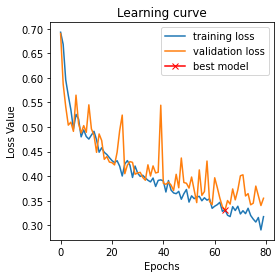

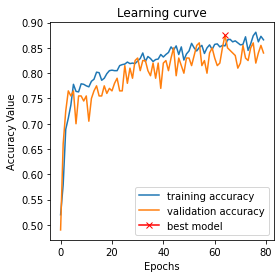

In [6]:
# 1)Import required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from Functions import plotcurve,vgg16_model
from tensorflow.keras.layers import Input

# 2) set the directory to the data and model parameters like:

train_dir = '../Data/Lab2/Skin/train' 
val_dir = '../Data/Lab2/Skin/validation/' 

# 3)Model architecture like:

# 4)Set train data generator like:

train_datagen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1, height_shift_range=0.1, rescale=1./255, horizontal_flip=True)

# 5)Compile the train generator over the training directory …:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128,128),
                                                    batch_size=8, class_mode='binary', shuffle=True)


# 6)Set and compile the validation generator like:
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(128,128),
                                                batch_size=8, class_mode='binary', shuffle=True)

# 7)Compile the model like:

lr= 1e-5
model9 = vgg16_model(3,128,128,64,True,0.4,1)
model9.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', 
                         metrics=['binary_accuracy'])

# 8)Training the model like:

n_epochs = 80
batch_size = 8

model_hist9 = model9.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=n_epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size)

# 9)Learning curve plots

plotcurve(model_hist9,metrics='binary')

Found 1112 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_102 (Conv2D)         (None, 128, 128, 64)      1792      
                                                                 
 conv2d_103 (Conv2D)         (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_104 (Conv2D)         (None, 64, 64, 128)       73856     
                                                                 
 conv2d_105 (Conv2D)         (None, 64, 64

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

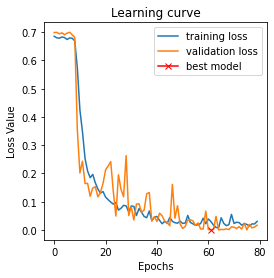

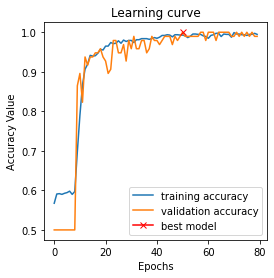

In [32]:
#vgg for bone dataset

# 1)Import required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from Functions import plotcurve,vgg16_model

# 2) set the directory to the data and model parameters like:

train_dir = '../Data/Lab2/Bone/train' 
val_dir = '../Data/Lab2/Bone/validation/' 

# 3)Model architecture like:

# 4)Set train data generator like:

train_datagen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1, height_shift_range=0.1, rescale=1./255, horizontal_flip=True)

# 5)Compile the train generator over the training directory …:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128,128),
                                                    batch_size=8, class_mode='binary', shuffle=True)


# 6)Set and compile the validation generator like:
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(128,128),
                                                batch_size=8, class_mode='binary', shuffle=True)

# 7)Compile the model like:

lr= 1e-5
model9 = vgg16_model(3,128,128,64,True,0.4,1)
model9.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', 
                         metrics=['binary_accuracy'])

# 8)Training the model like:

n_epochs = 80
batch_size = 8

model_hist9 = model9.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=n_epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size)

# 9)Learning curve plots

plotcurve(model_hist9,metrics='binary')